In [2]:
# API Request

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime

In [17]:

# Initial URL for the first API call
base_url = "https://clinicaltrials.gov/api/v2/studies"

params = {
    'fields': 'protocolSection.identificationModule.nctId,'
              'protocolSection.identificationModule.briefTitle,'
              'protocolSection.conditionsModule.conditions,'
              'protocolSection.statusModule.overallStatus,'
              'protocolSection.statusModule.startDateStruct,'
              'protocolSection.statusModule.primaryCompletionDateStruct,'
              'protocolSection.armsInterventionsModule.interventions,'
              'protocolSection.designModule.studyType,'
              'protocolSection.sponsorCollaboratorsModule.leadSponsor,'
              'protocolSection.sponsorCollaboratorsModule.collaborators,'
              'protocolSection.designModule.phases',
    'filter.overallStatus': 'NOT_YET_RECRUITING,RECRUITING',
    'filter.advanced': 'AREA[StartDate]RANGE[01/01/2024,MAX]',
    'pageSize': 1000,
    'format': 'json',
}

# Initialize an empty list to store the data
data_list = []

# Loop until there is no nextPageToken
while True:
    # Print the current URL (for debugging purposes)
    print("Fetching data from:", base_url + '?' + '&'.join([f"{k}={v}" for k, v in params.items()]))
    
    # Send a GET request to the API
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Parse JSON response
        studies = data.get('studies', [])  # Extract the list of studies

        # Loop through each study and extract specific information
        for study in studies:
            # Safely access nested keys
            nctId = study.get('protocolSection', {}).get('identificationModule', {}).get('nctId', 'Unknown')
            overallStatus = study.get('protocolSection', {}).get('statusModule', {}).get('overallStatus', 'Unknown')
            startDate = study.get('protocolSection', {}).get('statusModule', {}).get('startDateStruct', {}).get('date', 'Unknown Date')
            conditions = ', '.join(study.get('protocolSection', {}).get('conditionsModule', {}).get('conditions', ['No conditions listed']))
            acronym = study.get('protocolSection', {}).get('identificationModule', {}).get('acronym', 'Unknown')
            leadSponsor = study.get('protocolSection', {}).get('sponsorCollaboratorsModule', {}).get('leadSponsor', {}).get('name', 'Unknown')
            collaborators_list = study.get('protocolSection', {}).get('sponsorCollaboratorsModule', {}).get('collaborators', [])
            collaborators = ', '.join([collab.get('name', 'No collaborator listed') for collab in collaborators_list])

            # Extract interventions safely
            interventions_list = study.get('protocolSection', {}).get('armsInterventionsModule', {}).get('interventions', [])
            interventions = ', '.join([intervention.get('name', 'No intervention name listed') for intervention in interventions_list]) if interventions_list else "No interventions listed"
            
            # Extract locations safely
            locations_list = study.get('protocolSection', {}).get('contactsLocationsModule', {}).get('locations', [])
            locations = ', '.join([f"{location.get('city', 'No City')} - {location.get('country', 'No Country')}" for location in locations_list]) if locations_list else "No locations listed"
            
            # Extract dates and phases safely
            primaryCompletionDate = study.get('protocolSection', {}).get('statusModule', {}).get('primaryCompletionDateStruct', {}).get('date', 'Unknown Date')
            studyFirstPostDate = study.get('protocolSection', {}).get('statusModule', {}).get('studyFirstPostDateStruct', {}).get('date', 'Unknown Date')
            lastUpdatePostDate = study.get('protocolSection', {}).get('statusModule', {}).get('lastUpdatePostDateStruct', {}).get('date', 'Unknown Date')
            studyType = study.get('protocolSection', {}).get('designModule', {}).get('studyType', 'Unknown')
            phases = ', '.join(study.get('protocolSection', {}).get('designModule', {}).get('phases', ['Not Available']))

            # Append the data to the list as a dictionary
            data_list.append({
                "NCT ID": nctId,
                "Acronym": acronym,
                "Overall Status": overallStatus,
                "Start Date": startDate,
                "Conditions": conditions,
                "Interventions": interventions,
                "Locations": locations,
                "Primary Completion Date": primaryCompletionDate,
                "Study First Post Date": studyFirstPostDate,
                "Last Update Post Date": lastUpdatePostDate,
                "Study Type": studyType,
                "Phases": phases
            })

        # Check for nextPageToken and update the params or break the loop
        nextPageToken = data.get('nextPageToken')
        if nextPageToken:
            params['pageToken'] = nextPageToken  # Set the pageToken for the next request
        else:
            break  # Exit the loop if no nextPageToken is present
    else:
        print("Failed to fetch data. Status code:", response.status_code)
        break

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Optionally, save the DataFrame to a CSV file
df.to_csv("clinical_trials_data_complete.csv", index=False)


Fetching data from: https://clinicaltrials.gov/api/v2/studies?fields=protocolSection.identificationModule.nctId,protocolSection.identificationModule.briefTitle,protocolSection.conditionsModule.conditions,protocolSection.statusModule.overallStatus,protocolSection.statusModule.startDateStruct,protocolSection.statusModule.primaryCompletionDateStruct,protocolSection.armsInterventionsModule.interventions,protocolSection.designModule.studyType,protocolSection.sponsorCollaboratorsModule.leadSponsor,protocolSection.sponsorCollaboratorsModule.collaborators,protocolSection.designModule.phases&filter.overallStatus=NOT_YET_RECRUITING,RECRUITING&filter.advanced=AREA[StartDate]RANGE[01/01/2024,MAX]&pageSize=1000&format=json
Fetching data from: https://clinicaltrials.gov/api/v2/studies?fields=protocolSection.identificationModule.nctId,protocolSection.identificationModule.briefTitle,protocolSection.conditionsModule.conditions,protocolSection.statusModule.overallStatus,protocolSection.statusModule.star

In [18]:
# Inspect the raw studies data
for i, study in enumerate(studies[:5]):  # Check the first 5 studies
    print(f"Study {i+1}: {study}")
    print("\n")  # Add a blank line between studies for clarity


Study 1: {'protocolSection': {'identificationModule': {'nctId': 'NCT06384547', 'briefTitle': 'A Randomized, Active Controlled, Safety and Tolerability Study of VRDN-001 in Participants With Thyroid Eye Disease (TED)'}, 'statusModule': {'overallStatus': 'RECRUITING', 'startDateStruct': {'date': '2024-05-23', 'type': 'ACTUAL'}, 'primaryCompletionDateStruct': {'date': '2025-05', 'type': 'ESTIMATED'}}, 'sponsorCollaboratorsModule': {'leadSponsor': {'name': 'Viridian Therapeutics, Inc.', 'class': 'INDUSTRY'}}, 'conditionsModule': {'conditions': ['Thyroid Eye Disease']}, 'designModule': {'studyType': 'INTERVENTIONAL', 'phases': ['PHASE3']}, 'armsInterventionsModule': {'interventions': [{'type': 'DRUG', 'name': 'VRDN-001 10 mg/kg', 'description': '5 infusions of VRDN-001 10 mg/kg', 'armGroupLabels': ['VRDN-001 10 mg/kg']}, {'type': 'DRUG', 'name': 'VRDN-001 3 mg/kg', 'description': '5 infusions of VRDN-001 3 mg/kg', 'armGroupLabels': ['5 infusions of VRDN-001 3 mg/kg']}]}}}


Study 2: {'proto

In [4]:
# Print the DataFrame
print(df)

            NCT ID  Acronym      Overall Status  Start Date  \
0      NCT06091176  Unknown  NOT_YET_RECRUITING  2024-11-01   
1      NCT06838676  Unknown  NOT_YET_RECRUITING     2025-07   
2      NCT06564376  Unknown  NOT_YET_RECRUITING  2024-08-20   
3      NCT06687876  Unknown  NOT_YET_RECRUITING     2024-12   
4      NCT06869876  Unknown  NOT_YET_RECRUITING  2025-03-01   
...            ...      ...                 ...         ...   
40568  NCT06640387  Unknown          RECRUITING  2024-10-10   
40569  NCT06770387  Unknown  NOT_YET_RECRUITING  2025-01-27   
40570  NCT06671587  Unknown          RECRUITING  2024-12-10   
40571  NCT06655987  Unknown          RECRUITING  2024-07-04   
40572  NCT06550687  Unknown          RECRUITING  2024-09-19   

                                              Conditions  \
0           Essential Hypertension, Primary Hypertension   
1      Diffuse Intrinsic Pontine Gliomas (DIPG), Prog...   
2      AKI - Acute Kidney Injury, Arrythmia, Congenit...   
3  

In [5]:
print(df.columns)


Index(['NCT ID', 'Acronym', 'Overall Status', 'Start Date', 'Conditions',
       'Interventions', 'Locations', 'Primary Completion Date',
       'Study First Post Date', 'Last Update Post Date', 'Study Type',
       'Phases'],
      dtype='object')


In [6]:
# Ensure dates are in datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

# Calculate duration
df['Duration (days)'] = (df['Primary Completion Date'] - df['Start Date']).dt.days


In [7]:
# Ensure dates are in datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

# Calculate duration
df['Duration (days)'] = (df['Primary Completion Date'] - df['Start Date']).dt.days


In [8]:
df_filtered = df.dropna(subset=['Duration (days)'])


In [9]:
avg_duration = df_filtered['Duration (days)'].mean()
print(f"Average Duration (Days): {avg_duration:.2f}")


Average Duration (Days): 641.14


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("clinical_trials_data_complete.csv")

# Ensure dates are parsed correctly
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

# Calculate Duration
df['Duration (days)'] = (df['Primary Completion Date'] - df['Start Date']).dt.days

# Filter valid entries
df_filtered = df.dropna(subset=['Duration (days)'])
# Optionally, save the DataFrame to a CSV file
df_filtered.to_csv("clinical_trials_data_filtered_complete.csv", index=False)
# Summary Data
summary = {
    "Total Trials": len(df),
    "Trials with Valid Duration": len(df_filtered),
    "Top Condition": df['Conditions'].value_counts().idxmax(),
    "Top Intervention": df['Interventions'].value_counts().idxmax(),
    "Average Duration (Days)": df_filtered['Duration (days)'].mean(),
    "Missing Start Dates": df['Start Date'].isnull().sum(),
    "Missing Completion Dates": df['Primary Completion Date'].isnull().sum(),
    "Missing Phases": df['Phases'].isnull().sum(),
}

# Print Summary
for key, value in summary.items():
    print(f"{key}: {value}")



Total Trials: 40573
Trials with Valid Duration: 27218
Top Condition: Healthy
Top Intervention: No interventions listed
Average Duration (Days): 641.1410096259829
Missing Start Dates: 6459
Missing Completion Dates: 12994
Missing Phases: 18855


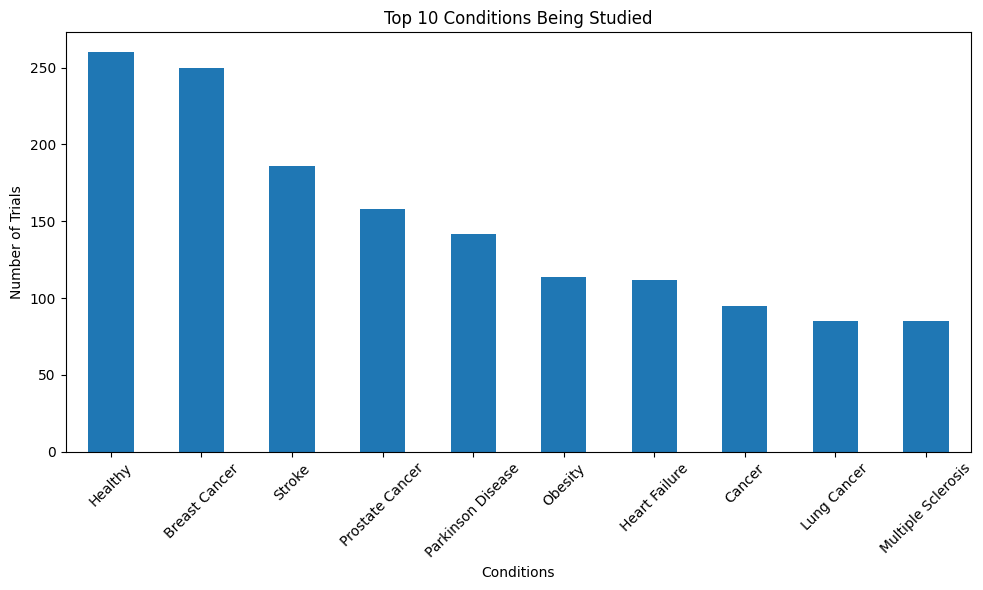

In [16]:
# --- Graphs ---

# 1. Top 10 Conditions
top_conditions = df['Conditions'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar')
plt.title("Top 10 Conditions Being Studied")
plt.xlabel("Conditions")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



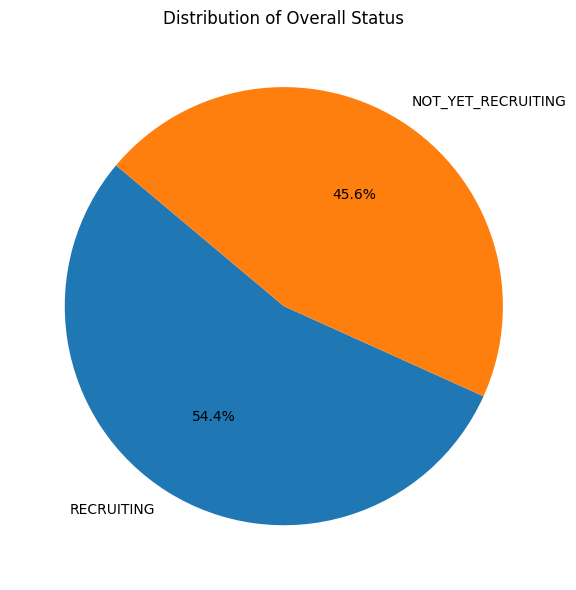

In [12]:
# 2. Distribution of Overall Status
status_distribution = df['Overall Status'].value_counts()
plt.figure(figsize=(8, 6))
status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Overall Status")
plt.ylabel("")  # Remove y-axis label for clarity
plt.tight_layout()
plt.show()


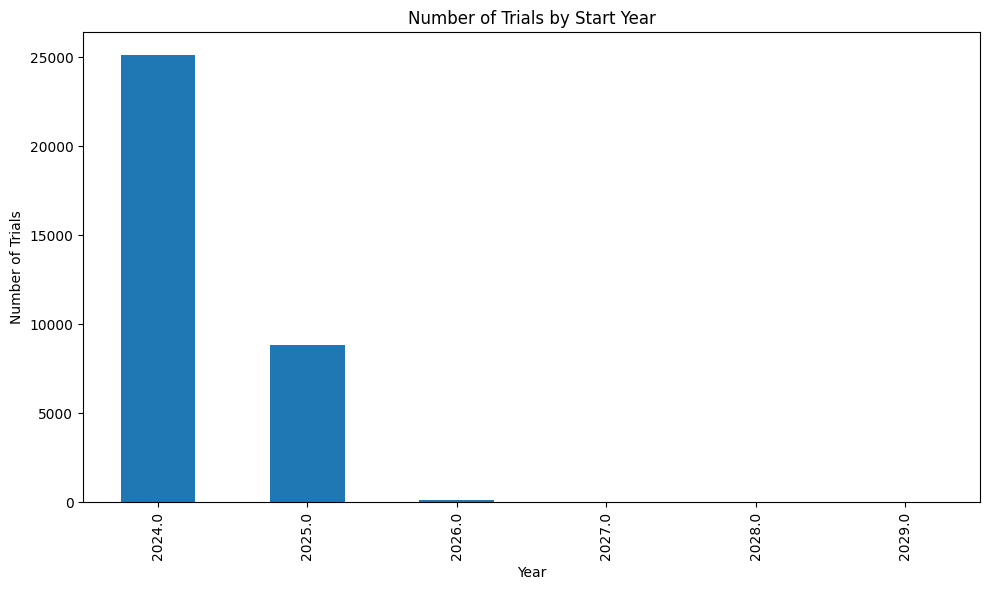

In [13]:

# 3. Trials by Start Year
df['Start Year'] = df['Start Date'].dt.year
trials_by_year = df['Start Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
trials_by_year.plot(kind='bar')
plt.title("Number of Trials by Start Year")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.tight_layout()
plt.show()


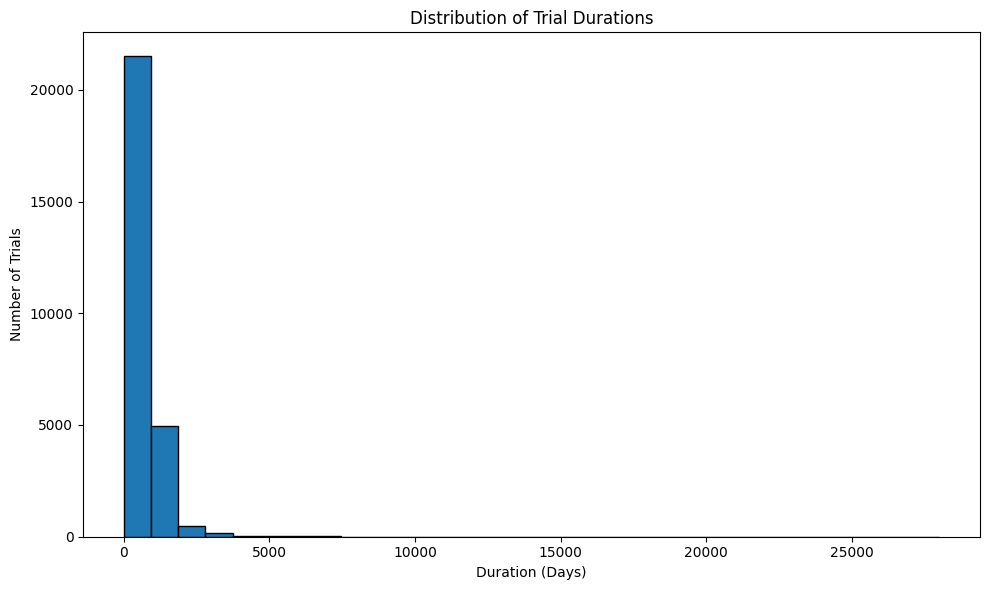

In [14]:
# 4. Duration Distribution
plt.figure(figsize=(10, 6))
df_filtered['Duration (days)'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Trial Durations")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Trials")
plt.tight_layout()
plt.show()

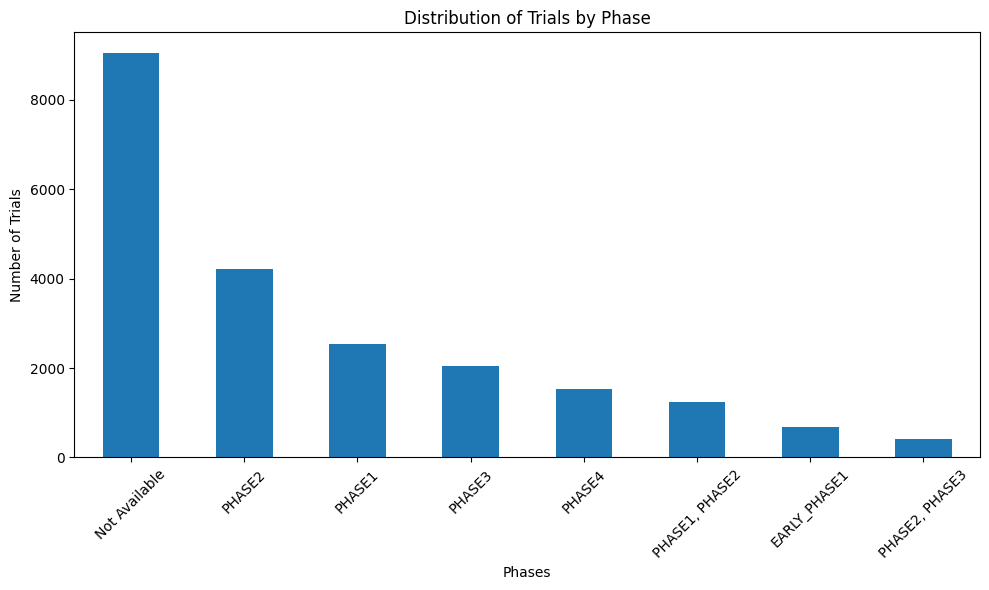

In [15]:
# 5. Phases Distribution
phases_distribution = df['Phases'].value_counts()
plt.figure(figsize=(10, 6))
phases_distribution.plot(kind='bar')
plt.title("Distribution of Trials by Phase")
plt.xlabel("Phases")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()